# Лабораторная работа №5. Кластеризация

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wine_data = pd.read_csv(filepath_or_buffer="datasets\\winequality-white.csv", delimiter=";")

In [3]:
wine_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [4]:
wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
norm_wine_data = (wine_data - wine_data.min()) / (wine_data.max() - wine_data.min())

In [7]:
norm_wine_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        0.293730          0.194354     0.201320        0.088825   
std         0.081141          0.098818     0.072903        0.077792   
min         0.000000          0.000000     0.000000        0.000000   
25%         0.240385          0.127451     0.162651        0.016871   
50%         0.288462          0.176471     0.192771        0.070552   
75%         0.336538          0.235294     0.234940        0.142638   
max         1.000000          1.000000     1.000000        1.000000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.109117             0.116056              0.300141     0.133360   
std       0.064831             0.059258              0.098603     0.057662   
min       0.000000             0.000000              0.000000     0.000000   
25%       0.080119             0.073171              0.229698     0.088924   
50%       0.100890             0.111498              0.290023     0.127820   
75%       0.121662             0.153310              0.366589     0.173318   
max       1.000000             1.000000              1.000000     1.000000   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      0.425697     0.313775     0.405527     0.479652  
std       0.137273     0.132704     0.198487     0.147606  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.336364     0.220930     0.241935     0.333333  
50%       0.418182     0.290698     0.387097     0.500000  
75%       0.509091     0.383721     0.548387     0.500000  
max       1.000000     1.000000     1.000000     1.000000

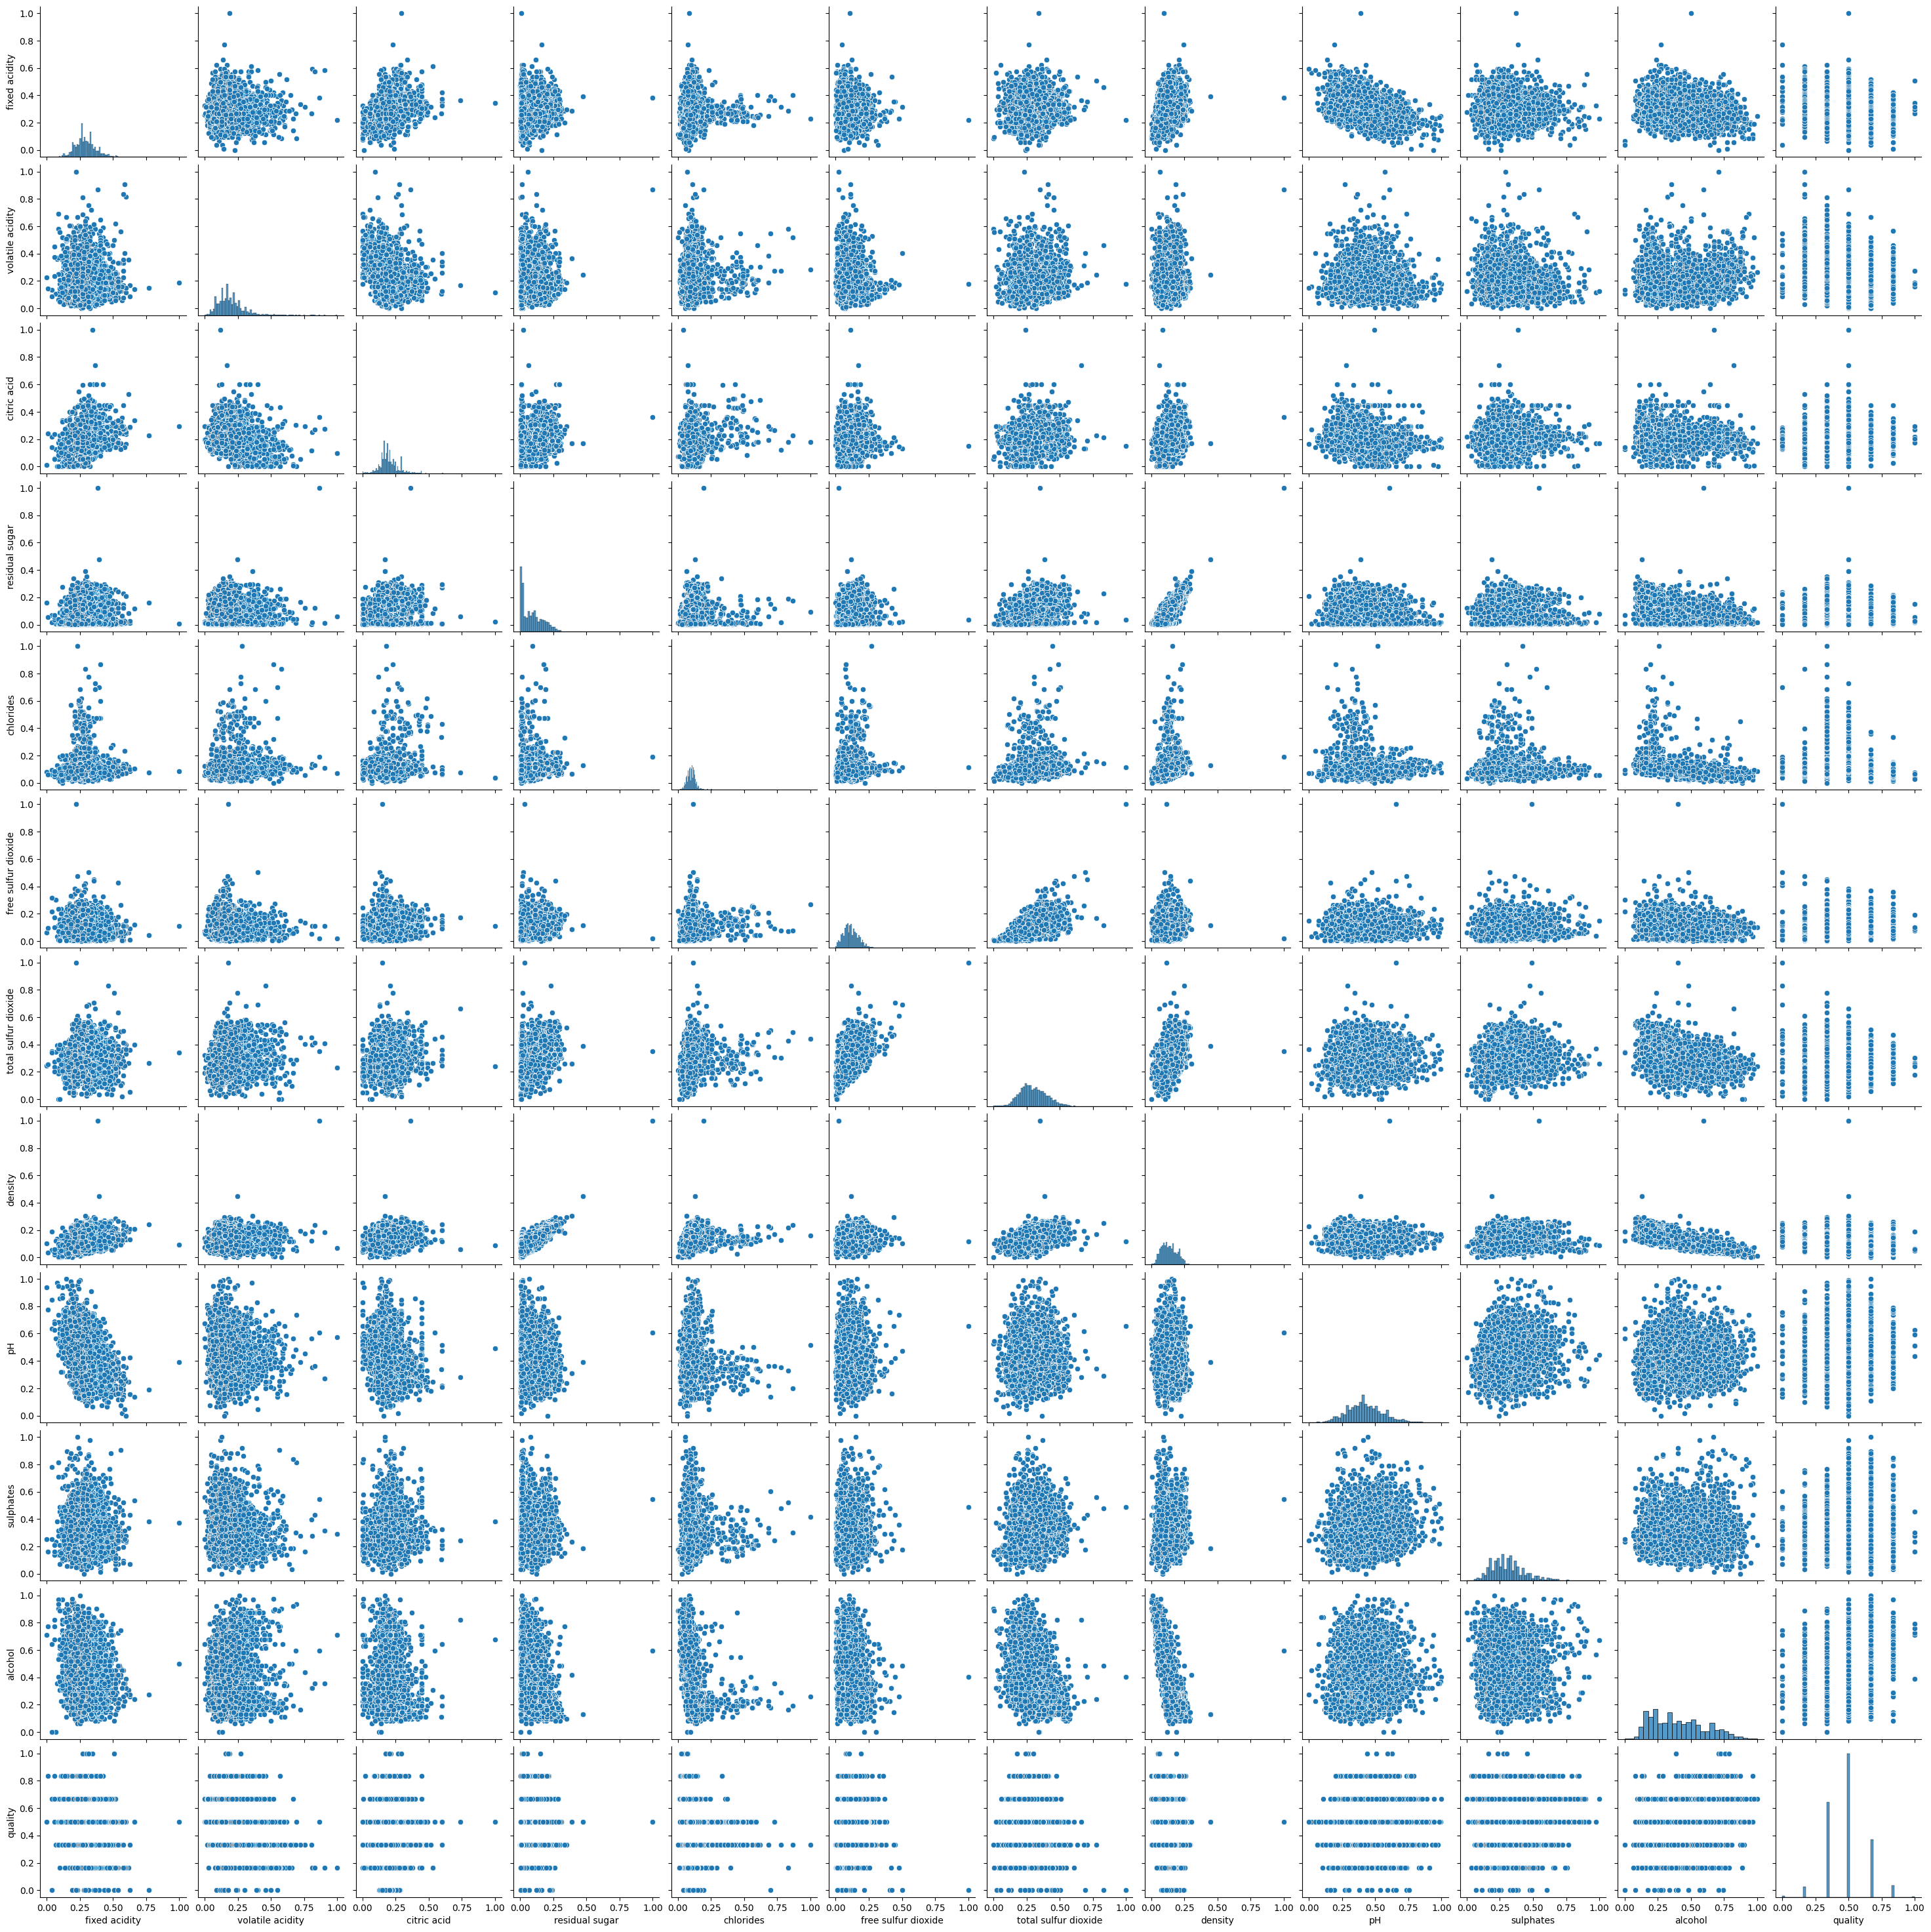

In [8]:
sns.pairplot(norm_wine_data)

In [9]:
# sulphates - chlorides

<AxesSubplot:xlabel='sulphates', ylabel='chlorides'>

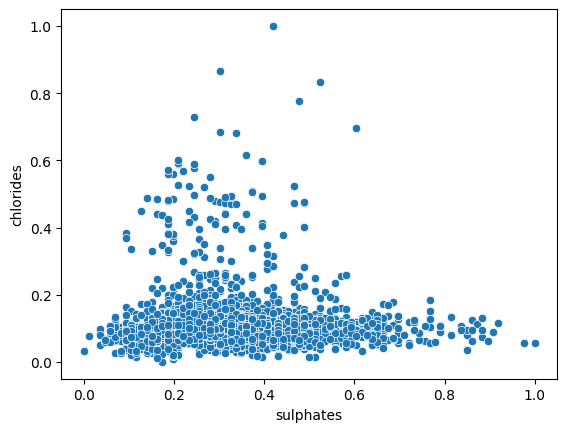

In [10]:
sns.scatterplot(data=norm_wine_data, x='sulphates', y='chlorides')

In [11]:
cluster_wine_data = norm_wine_data.loc[:, ['sulphates', 'chlorides']]

In [12]:
from sklearn.cluster import KMeans

In [31]:
kmeans_model = KMeans(n_clusters=5)
kmeans_model.fit(cluster_wine_data)
y_kmeans = kmeans_model.predict(cluster_wine_data)

Text(0, 0.5, 'chlorides')

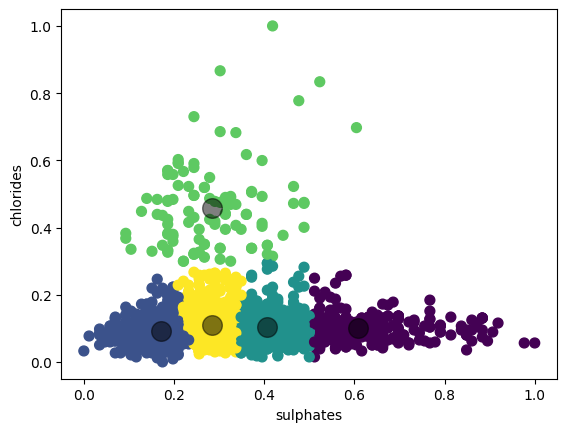

In [38]:
plt.scatter(x=cluster_wine_data['sulphates'], 
            y=cluster_wine_data['chlorides'], 
            c=y_kmeans, s=50, cmap='viridis')

centers = kmeans_model.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.xlabel('sulphates')
plt.ylabel('chlorides')

In [50]:
from sklearn.metrics import silhouette_score

In [51]:
silhouette_avg = silhouette_score(cluster_wine_data, y_kmeans)
n_clusters = len(np.unique(y_kmeans))
print(f"Для {n_clusters} кластеров средний коэффициент силуэта :", silhouette_avg.round(3))

Для 5 кластеров средний коэффициент силуэта : 0.422


Для 2 кластеров средний коэффициент силуэта : 0.485
Для 3 кластеров средний коэффициент силуэта : 0.432
Для 4 кластеров средний коэффициент силуэта : 0.463
Для 5 кластеров средний коэффициент силуэта : 0.426
Для 6 кластеров средний коэффициент силуэта : 0.393
Для 7 кластеров средний коэффициент силуэта : 0.377
Для 8 кластеров средний коэффициент силуэта : 0.342
Для 9 кластеров средний коэффициент силуэта : 0.354
Для 10 кластеров средний коэффициент силуэта : 0.34


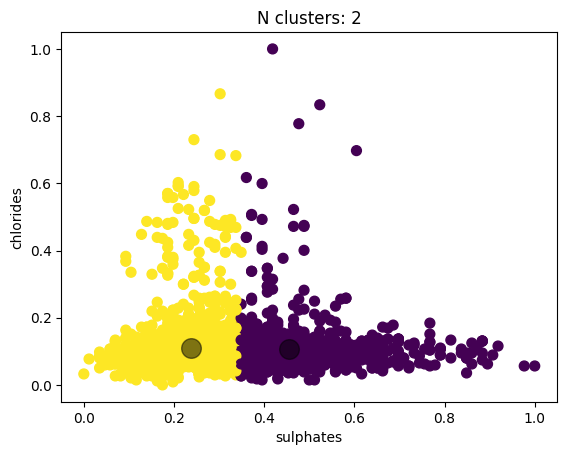

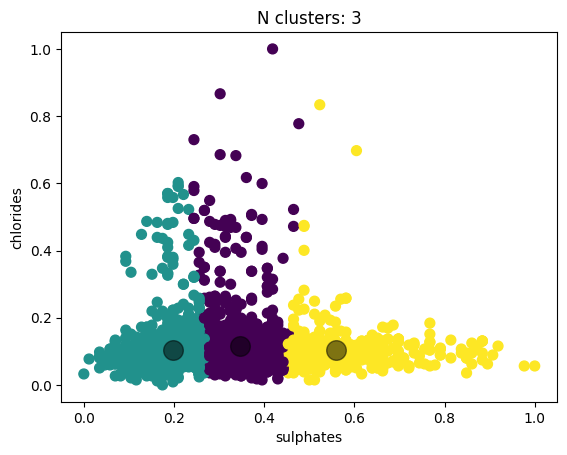

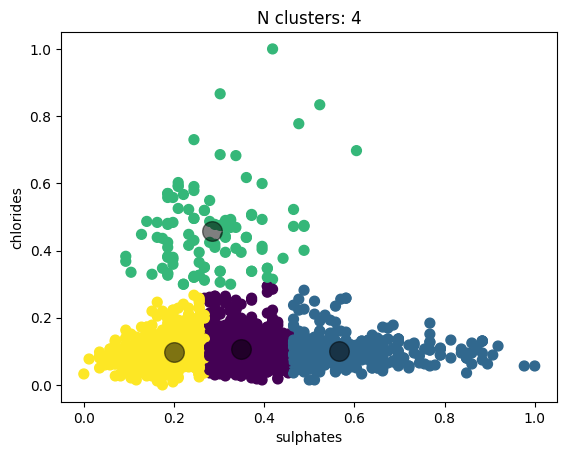

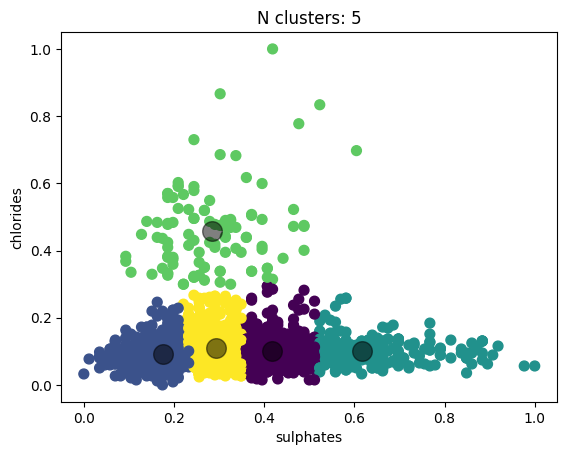

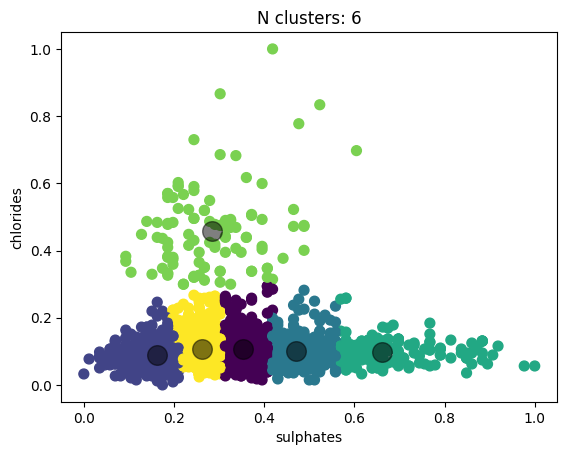

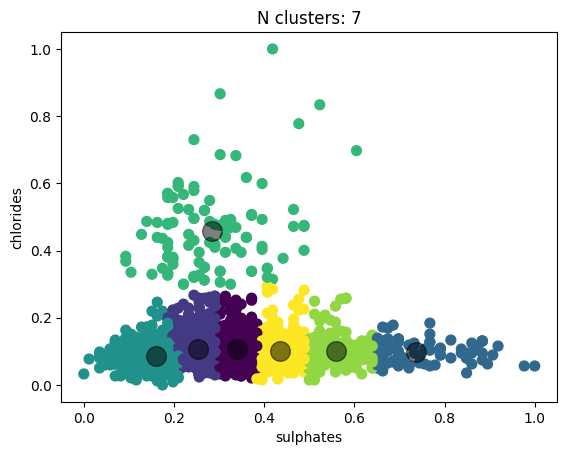

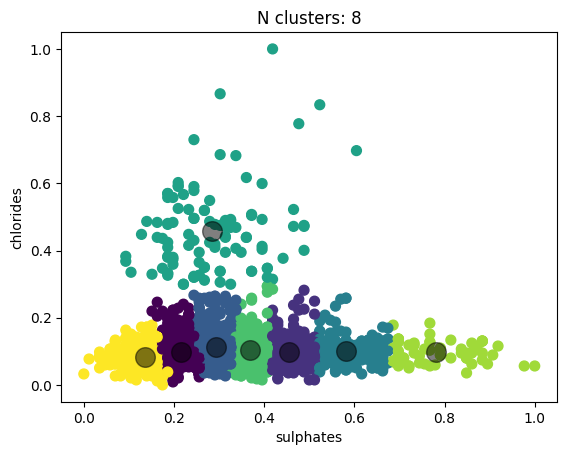

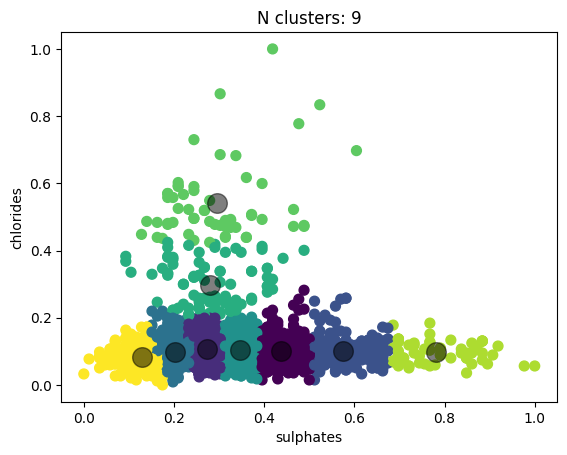

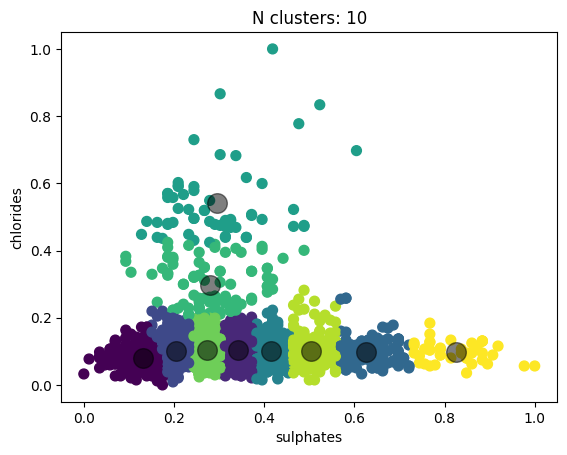

In [54]:
# задаем количество кластеров для оценки
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
inertias = []

for n_clusters in range_n_clusters:
    # задаем параметры графика
    fig, axs = plt.subplots()
    
    # запускаем алгоритм K-means
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=10)
    kmeans_model.fit(cluster_wine_data)
    
    # расчет шумов для метода локтя
    inertias.append(kmeans_model.inertia_)
    y_kmeans = kmeans_model.predict(cluster_wine_data)
    
    # расчет коэффициента силуэта
    silhouette_avg = silhouette_score(cluster_wine_data, y_kmeans)
    print(f"Для {n_clusters} кластеров средний коэффициент силуэта : {silhouette_avg.round(3)}")
    
    axs = plt.scatter(x=cluster_wine_data['sulphates'], 
                      y=cluster_wine_data['chlorides'],
                      c=y_kmeans, s=50, cmap='viridis')
    
    centers = kmeans_model.cluster_centers_
    axs = plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    plt.title(f'N clusters: {n_clusters}')
    plt.xlabel('sulphates')
    plt.ylabel('chlorides')
    
plt.show()

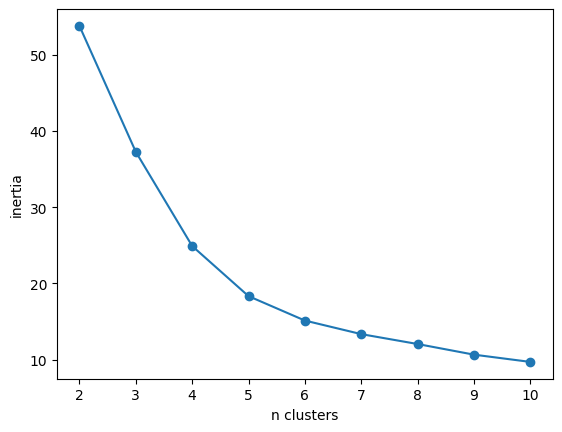

In [55]:
plt.plot(range_n_clusters, inertias, marker='o')
plt.xlabel('n clusters')
plt.ylabel('inertia')
plt.show()

In [64]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid

In [65]:
agg_model = AgglomerativeClustering(n_clusters=5)
agg_model.fit(cluster_wine_data)
y_agg = agg_model.labels_

In [66]:
nearest_model = NearestCentroid()
nearest_model.fit(cluster_wine_data, y_agg)

NearestCentroid()

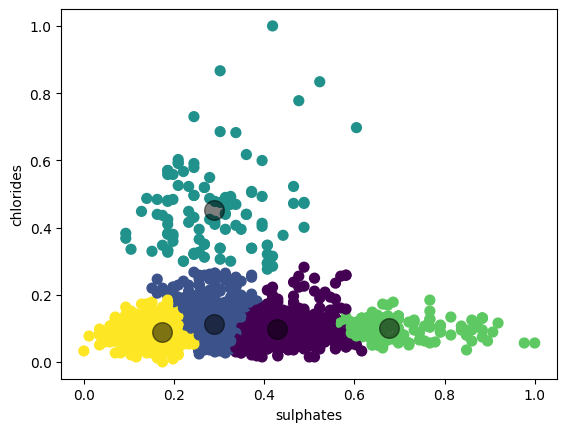

In [67]:
plt.scatter(x=cluster_wine_data['sulphates'],
            y=cluster_wine_data['chlorides'],
            s=50, cmap='viridis', c=y_agg)

centers = nearest_model.centroids_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.xlabel('sulphates')
plt.ylabel('chlorides')

plt.show()

In [68]:
silhouette_avg = silhouette_score(cluster_wine_data, y_agg)
n_clusters = len(np.unique(y_agg))
print(f"Для {n_clusters} кластеров средний коэффициент силуэта :", silhouette_avg.round(3))

Для 5 кластеров средний коэффициент силуэта : 0.402


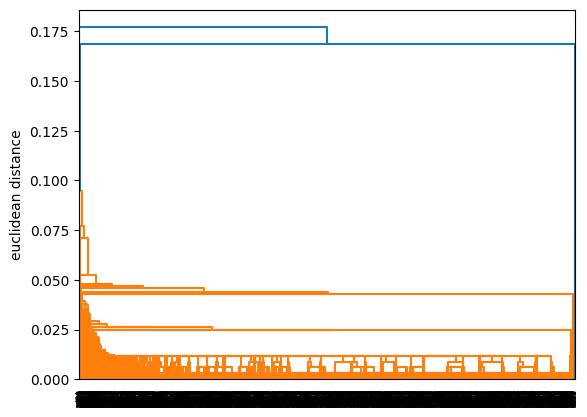

In [72]:
from scipy.cluster.hierarchy import linkage, dendrogram

dendrogram = dendrogram(linkage(cluster_wine_data, method='single'), 
                        labels = cluster_wine_data.index)

plt.ylabel('euclidean distance')
plt.show()

Для 2 кластеров средний коэффициент силуэта : 0.477
Для 3 кластеров средний коэффициент силуэта : 0.504
Для 4 кластеров средний коэффициент силуэта : 0.467
Для 5 кластеров средний коэффициент силуэта : 0.402
Для 6 кластеров средний коэффициент силуэта : 0.381
Для 7 кластеров средний коэффициент силуэта : 0.317
Для 8 кластеров средний коэффициент силуэта : 0.302
Для 9 кластеров средний коэффициент силуэта : 0.301
Для 10 кластеров средний коэффициент силуэта : 0.299


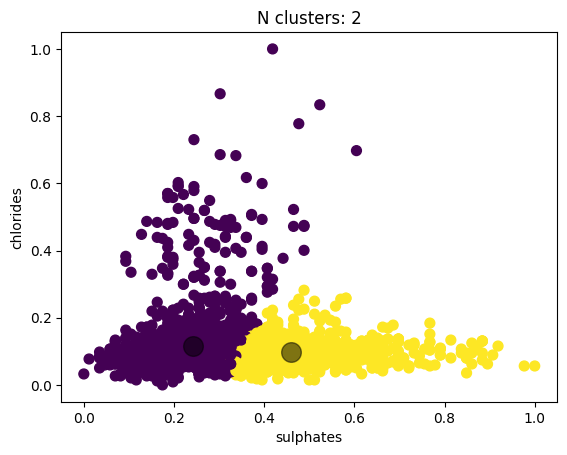

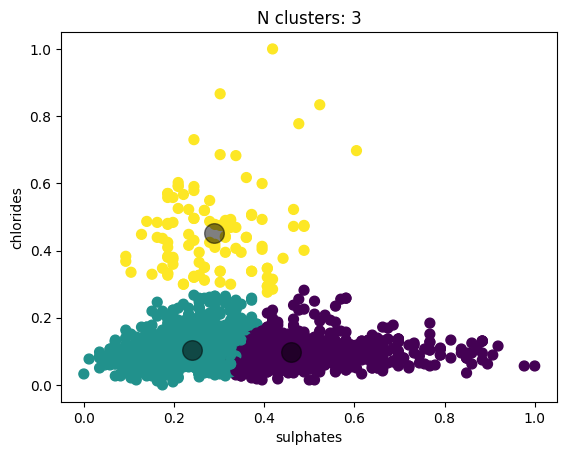

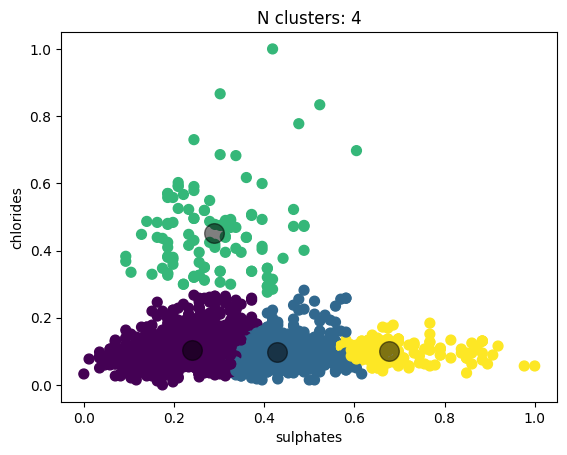

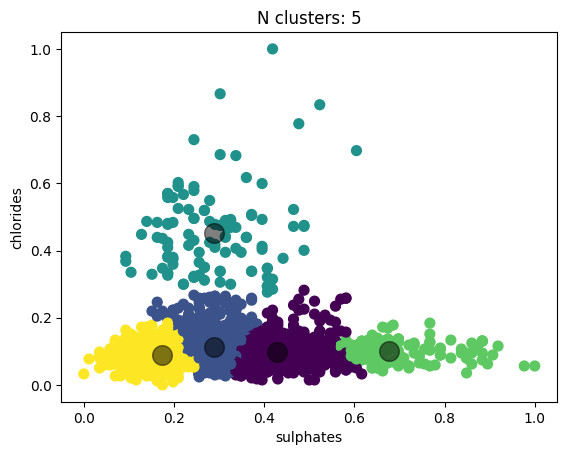

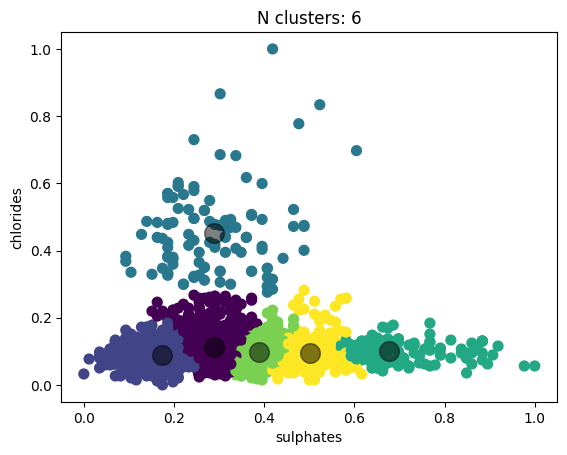

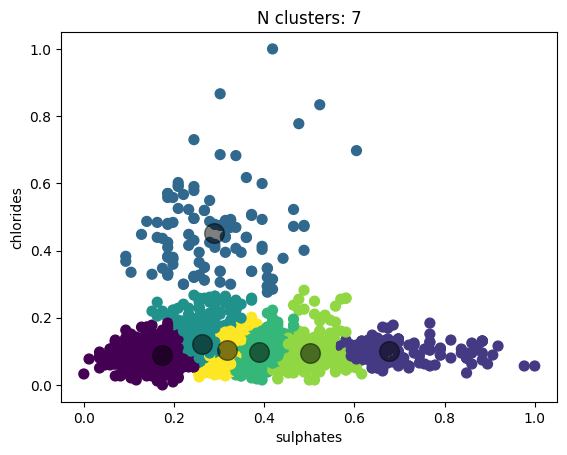

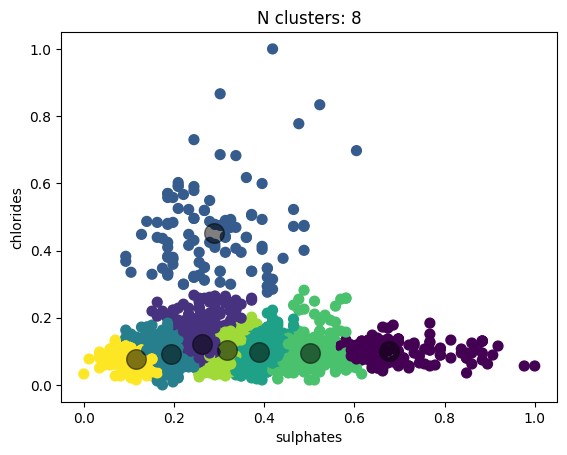

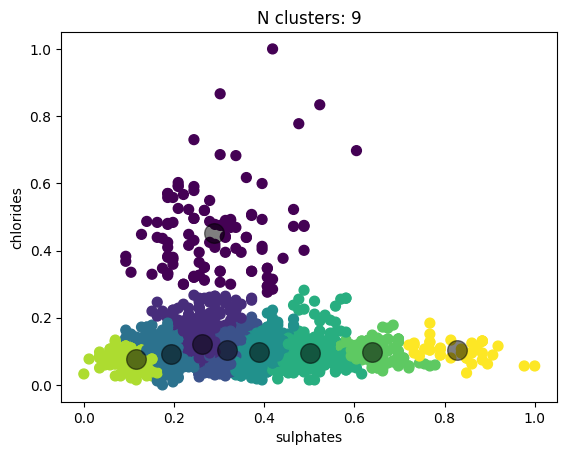

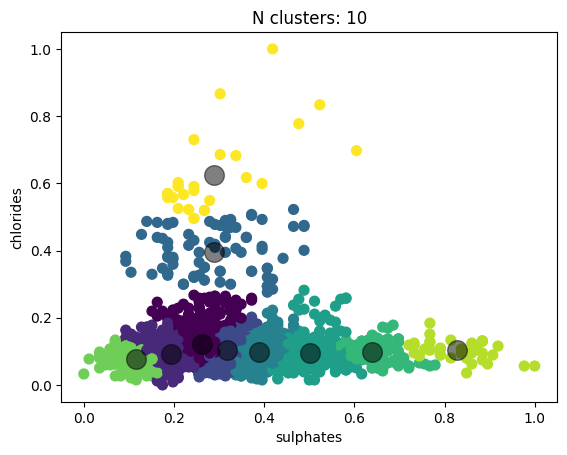

In [71]:
# задаем количество кластеров для оценки
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
distortions = []

for n_clusters in range_n_clusters:
    # задаем параметры графика
    fig, axs = plt.subplots()
    
    # запускаем алгоритм агломеративной кластеризации
    agg_model = AgglomerativeClustering(n_clusters=n_clusters)
    agg_model.fit(cluster_wine_data)
    y_agg = agg_model.labels_
    
    axs = plt.scatter(x=cluster_wine_data['sulphates'], 
                      y=cluster_wine_data['chlorides'],
                      c=y_agg, s=50, cmap='viridis')

    plt.title(f'N clusters: {n_clusters}')
    plt.xlabel('sulphates')
    plt.ylabel('chlorides')

    # расчет коэффициента силуэта
    silhouette_avg = silhouette_score(cluster_wine_data, y_agg)
    print(f"Для {n_clusters} кластеров средний коэффициент силуэта : {silhouette_avg.round(3)}")
    
    # определение центров кластеров
    nearest_model = NearestCentroid()
    nearest_model.fit(cluster_wine_data, y_agg)

    centers = nearest_model.centroids_

    axs = plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()

In [73]:
from sklearn.cluster import DBSCAN

In [84]:
dbscan = DBSCAN(eps=0.04, min_samples = 4)
y_dbscan = dbscan.fit_predict(cluster_wine_data)

In [85]:
nearest_model = NearestCentroid()
nearest_model.fit(cluster_wine_data, y_dbscan)

NearestCentroid()

Text(0, 0.5, 'chlorides')

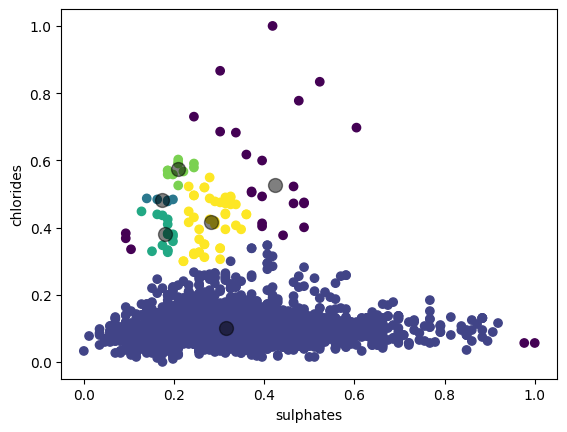

In [86]:
plt.scatter(x=cluster_wine_data['sulphates'], 
            y=cluster_wine_data['chlorides'], 
            c=y_dbscan)

centers = nearest_model.centroids_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

plt.xlabel('sulphates')
plt.ylabel('chlorides')

In [87]:
silhouette_avg = silhouette_score(cluster_wine_data, y_dbscan)
n_clusters = len(np.unique(y_dbscan))
print(f"Для {n_clusters} кластеров средний коэффициент силуэта :", silhouette_avg.round(3))

Для 6 кластеров средний коэффициент силуэта : 0.503


Text(0, 0.5, 'Distance')

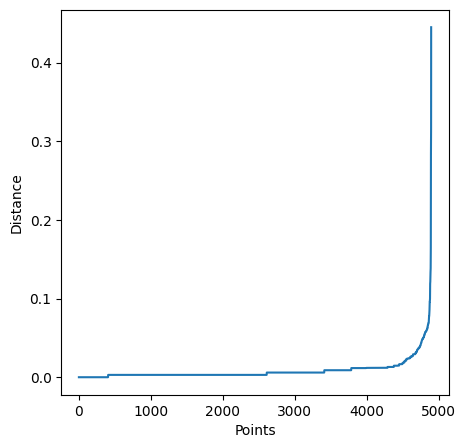

In [29]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(cluster_wine_data)
distances, indices = neighbors.kneighbors(cluster_wine_data)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance')